In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
train = pd.read_csv("./Titanic/train.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling Missing Data

In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


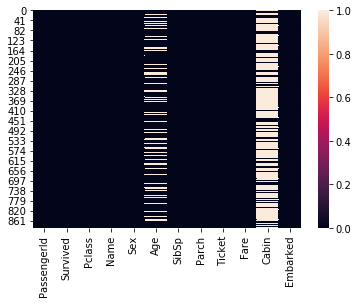

In [8]:
sns.heatmap(train.isnull())

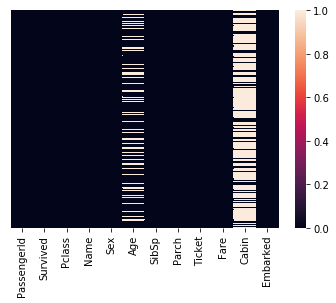

In [9]:
sns.heatmap(train.isnull(), yticklabels=False)

* The features Age and Cabin have missing values.
* There are less missing values in Age, we can try to impute some values
* There are lots of missing values in Cabin - we can either drop it or change to as 'CabinKnown' to be 0 or 1

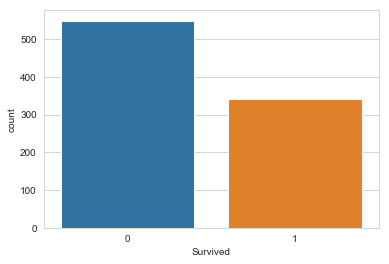

In [13]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=train)
plt.show()

* The number of people who survived is lesser than those who didn't

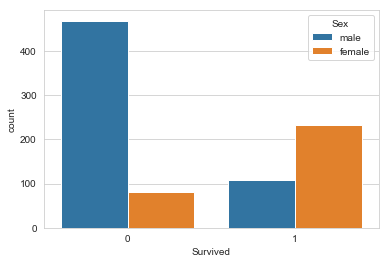

In [14]:
sns.countplot('Survived', hue='Sex', data=train,)
plt.show()

* Among the people who didn't survive, the number of males was more compared to females
* Among the people who did survive, the number of females was more compared to males

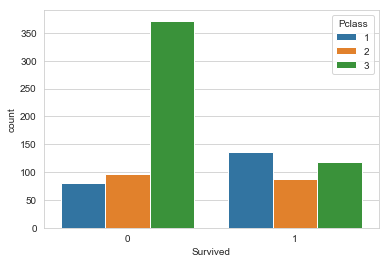

In [16]:
sns.countplot('Survived', hue='Pclass', data=train)
plt.show()

* Among the people who didn't survive, the highest number of people were from Passenger Class 3. 
* The other 2 clasess were comparatively very low.
* There wasn't much of difference in the numbers based on Passenger Class for those who survived.

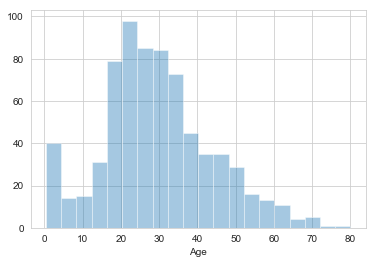

In [23]:
sns.distplot(train['Age'].dropna(), kde=False)
plt.show()

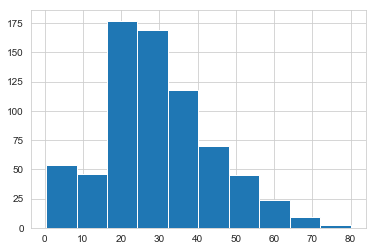

In [25]:
plt.hist(train['Age'].dropna())
plt.show()

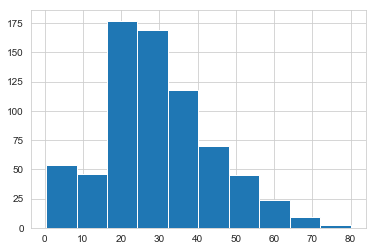

In [28]:
train['Age'].hist()

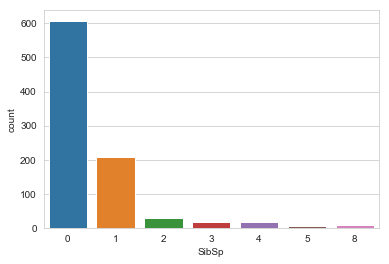

In [27]:
sns.countplot('SibSp', data=train)
plt.show()

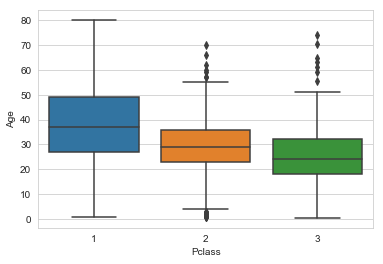

In [29]:
sns.boxplot(x='Pclass', y='Age', data=train)
plt.show()

* The average age for the people in Passenger Class 1 was higher than that of Class 2 and 3
* The above boxplot is important as we can use the median of age based on Passenger Class to impute the missing values
* Passenger Class 1: 37 years
* Passenger Class 2: 29 years
* Passenger Class 3: 24 years

In [41]:
# Define a function to impute missing value of age from the above understanding

def impute_age(Cols):
    Age=Cols[0]
    Pclass=Cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
            
        else:
            return 24
            
    else:
        return Age
    

In [64]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

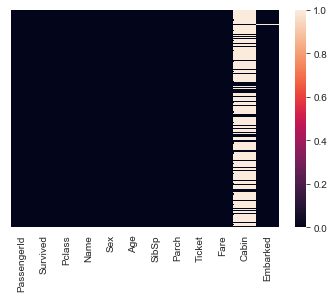

In [43]:
sns.heatmap(train.isnull(),yticklabels=False)
plt.show()

In [65]:
# Drop Cabin columns as there are too many missing values

train.drop(columns='Cabin', inplace=True)

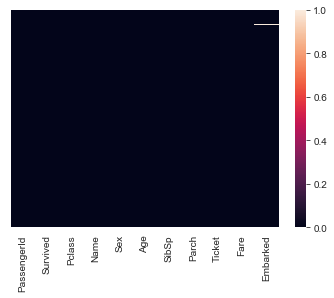

In [45]:
sns.heatmap(train.isnull(), yticklabels=False)
plt.show()

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [66]:
train.dropna(inplace=True)

#### Handling Categorical Features

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


* Categorical Features: Survived, Pclass, Sex, SibSp, Parch, Embarked
* Name and Ticket does not provide any help in the EDA
* Sex and Emabarked are categorical features of type object, which we would need to convert into numeric for model building

In [51]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [54]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [67]:
train.drop(columns=['Name','Ticket','Sex','Embarked'], inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [68]:
# Cobmine the sex and embark data frames prepared above

train = pd.concat([train,sex,embark],axis=1,)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


* Dependent Feature: Survived

### Building a Logistic Regression Model

* We can drop the dependent variable

In [61]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


* Split the data into Train and Test data
* Typically into 70:30 ratio

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns='Survived'),
                                                   train['Survived'], test_size=0.30,
                                                   random_state=101)

#### Training and Predicting

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\pmaht\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
predictions = logmodel.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
accuracy = confusion_matrix(y_test,predictions)
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8202247191011236